<a href="https://colab.research.google.com/github/Makuo67/Breast-Cancer-Prediction/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Breast Cancer Prediction**
### Objective: This project aims to explore the implementation of Machine Learning Models with regularization, optimization, and Error analysis techniques used in machine learning to improve models' performance, convergence speed, and efficiency.

## **Data set:**  Breast Cancer Wisconsin (Diagnostic) Data Set
Predict whether the cancer is benign or malignant.

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

In [119]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv1D, Dropout, MaxPool1D, BatchNormalization
from IPython.display import SVG
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import model_to_dot, plot_model
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.regularizers import l1, l2
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.metrics import confusion_matrix, classification_report

# SECTION 1: Exploratory Data Analysis

In [3]:
df = pd.read_csv("data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Check for missing data

In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:


## Drop the Unnamed column



In [7]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)
df.sample(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
555,B,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,0.1593,...,10.84,34.91,69.57,357.6,0.1384,0.17100,0.20000,0.09127,0.2226,0.08283
428,B,11.13,16.62,70.47,381.1,0.08151,0.03834,0.01369,0.01370,0.1511,...,11.68,20.29,74.35,421.1,0.1030,0.06219,0.04580,0.04044,0.2383,0.07083
150,B,13.00,20.78,83.51,519.4,0.11350,0.07589,0.03136,0.02645,0.2540,...,14.16,24.11,90.82,616.7,0.1297,0.11050,0.08112,0.06296,0.3196,0.06435


In [8]:
round(df.describe(),1)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,...,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0
mean,14.1,19.3,92.0,654.9,0.1,0.1,0.1,0.0,0.2,0.1,...,16.3,25.7,107.3,880.6,0.1,0.3,0.3,0.1,0.3,0.1
std,3.5,4.3,24.3,351.9,0.0,0.1,0.1,0.0,0.0,0.0,...,4.8,6.1,33.6,569.4,0.0,0.2,0.2,0.1,0.1,0.0
min,7.0,9.7,43.8,143.5,0.1,0.0,0.0,0.0,0.1,0.0,...,7.9,12.0,50.4,185.2,0.1,0.0,0.0,0.0,0.2,0.1
25%,11.7,16.2,75.2,420.3,0.1,0.1,0.0,0.0,0.2,0.1,...,13.0,21.1,84.1,515.3,0.1,0.1,0.1,0.1,0.3,0.1
50%,13.4,18.8,86.2,551.1,0.1,0.1,0.1,0.0,0.2,0.1,...,15.0,25.4,97.7,686.5,0.1,0.2,0.2,0.1,0.3,0.1
75%,15.8,21.8,104.1,782.7,0.1,0.1,0.1,0.1,0.2,0.1,...,18.8,29.7,125.4,1084.0,0.1,0.3,0.4,0.2,0.3,0.1
max,28.1,39.3,188.5,2501.0,0.2,0.3,0.4,0.2,0.3,0.1,...,36.0,49.5,251.2,4254.0,0.2,1.1,1.3,0.3,0.7,0.2


In [10]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## Finding Correlation

In [41]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for Wissonsin Breast Cancer Dataset', fontsize=15)
    plt.show()

<ipython-input-41-e249d8a1cf3d>:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.

<ipython-input-41-e249d8a1cf3d>:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



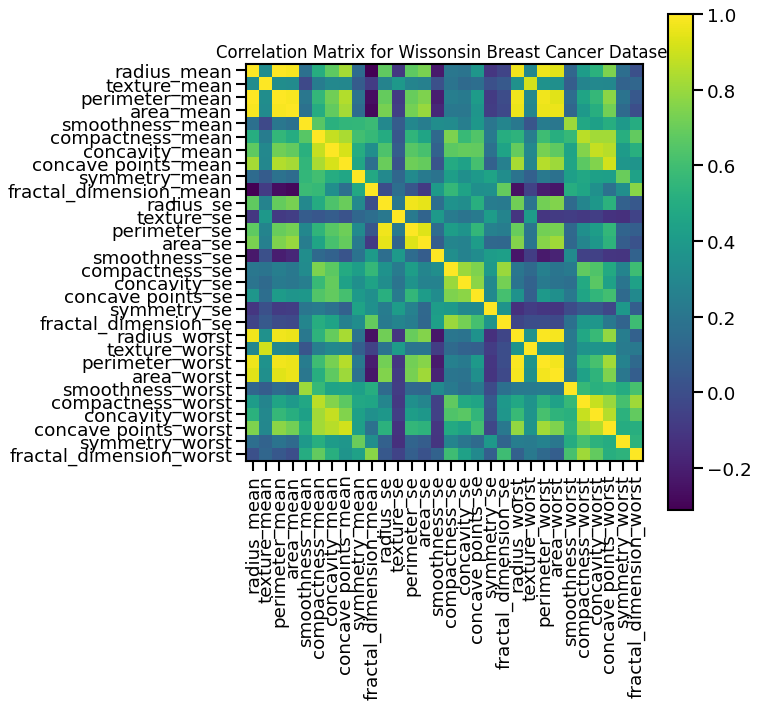

In [42]:
plotCorrelationMatrix(df, 8)

## Scatter and Density Plot

In [49]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

<ipython-input-49-d6f0f127ac9b>:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.



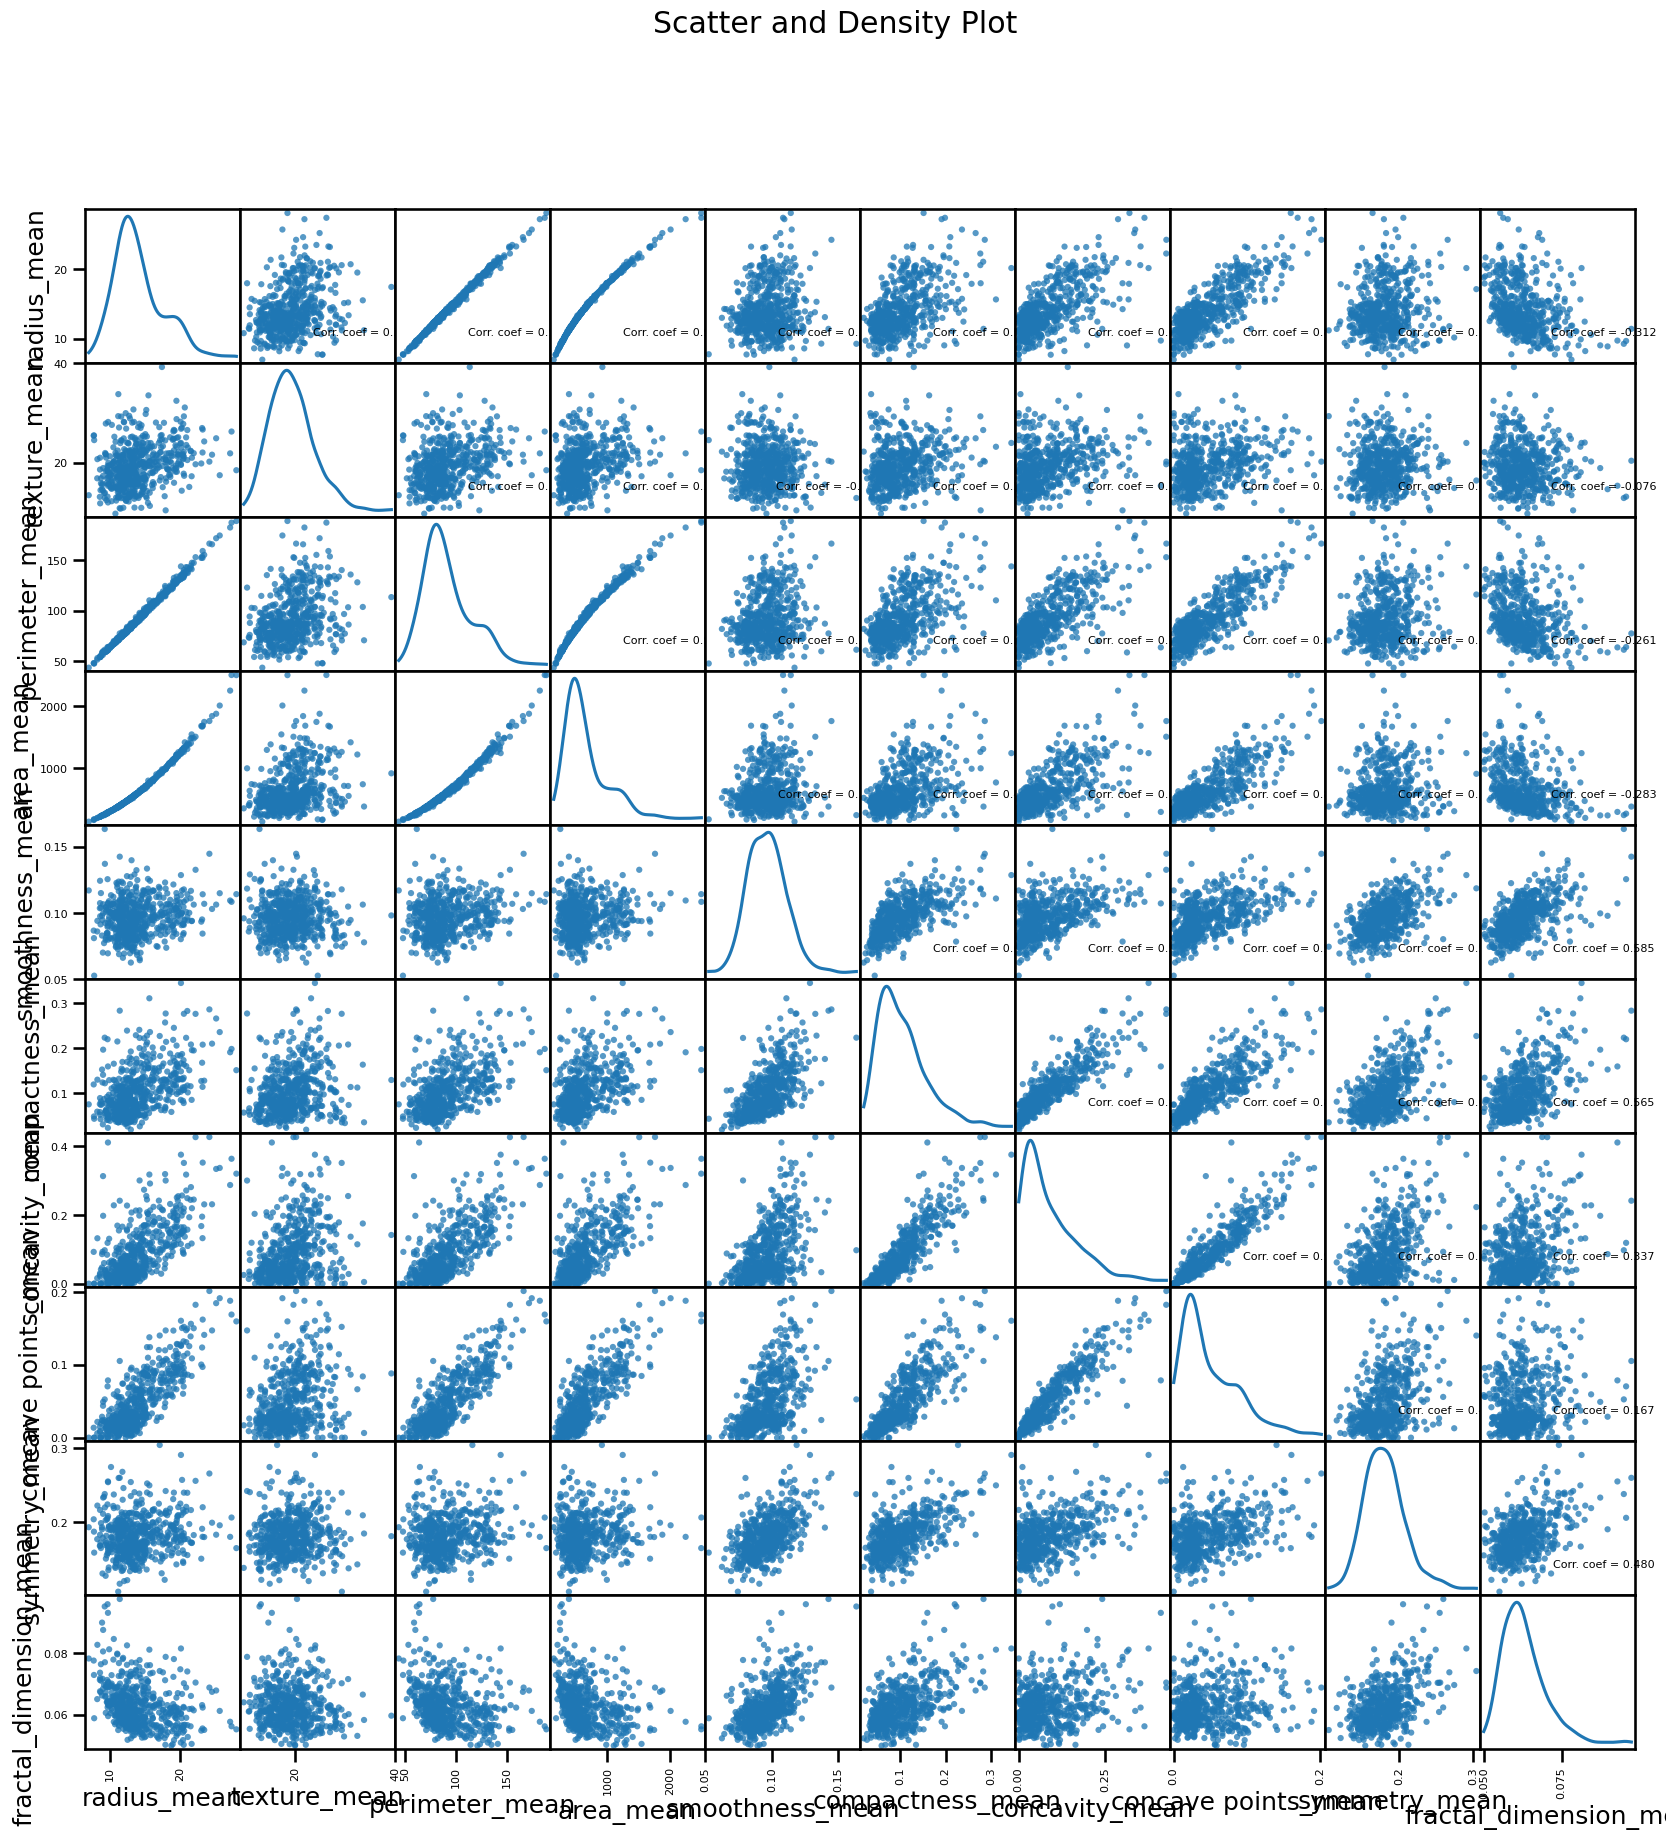

In [50]:
plotScatterMatrix(df, 20, 8)

## SECTION 2: Data Preprocessing

In [21]:
# Define features x and y
x=df.drop("diagnosis",axis=1)
y=df.diagnosis


In [24]:
# Encoding the categorical target (B, M)
encoder=LabelEncoder()
y=encoder.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [30]:
# Standardizing the training features
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [52]:
print(x.shape,y.shape)


(569, 30) (569,)


In [53]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
print(X_train.shape)
print(X_test.shape)

(455, 30)
(114, 30)


## Train Model without Optimization

In [104]:
epochs = 50
model = Sequential()
# Add convolution 2D
model.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64,kernel_size=2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))



In [105]:
# Compile the model without any optimization technique
model.compile(loss=categorical_crossentropy,
              metrics=['accuracy'])
model.save('saved_models/model1.pkl')

In [106]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 29, 32)            96        
                                                                 
 batch_normalization_8 (Bat  (None, 29, 32)            128       
 chNormalization)                                                
                                                                 
 dropout_12 (Dropout)        (None, 29, 32)            0         
                                                                 
 conv1d_10 (Conv1D)          (None, 28, 64)            4160      
                                                                 
 batch_normalization_9 (Bat  (None, 28, 64)            256       
 chNormalization)                                                
                                                                 
 dropout_13 (Dropout)        (None, 28, 64)          

In [107]:
# Train the model
history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning:

In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.



15/15 [==============================] - 2s 34ms/step - loss: 0.0000e+00 - accuracy: 0.8593 - val_loss: 0.0000e+00 - val_accuracy: 0.9035
Epoch 2/50
15/15 [==============================] - 0s 13ms/step - loss: 0.0000e+00 - accuracy: 0.9099 - val_loss: 0.0000e+00 - val_accuracy: 0.8596
Epoch 3/50
15/15 [==============================] - 0s 14ms/step - loss: 0.0000e+00 - accuracy: 0.9275 - val_loss: 0.0000e+00 - val_accuracy: 0.7982
Epoch 4/50
15/15 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 0.9165 - val_loss: 0.0000e+00 - val_accuracy: 0.7456
Epoch 5/50
15/15 [==============================] - 0s 14ms/step - loss: 0.0000e+00 - accuracy: 0.9121 - val_loss: 0.0000e+00 - val_accuracy: 0.6491
Epoch 6/50
15/15 [==============================] - 0s 14ms/step - loss: 0.0000e+00 - accuracy: 0.9319 - val_loss: 0.0000e+00 - val_accuracy: 0.6404
Epoch 7/50
15/15 [==============================] - 0s 12ms/step - loss: 0.0000e+00 - accuracy: 0.9209 - val_loss: 0.

In [108]:
# Print the final accuracy
_, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

4/4 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.9211
Training Accuracy: 89.45%
Test Accuracy: 92.11%


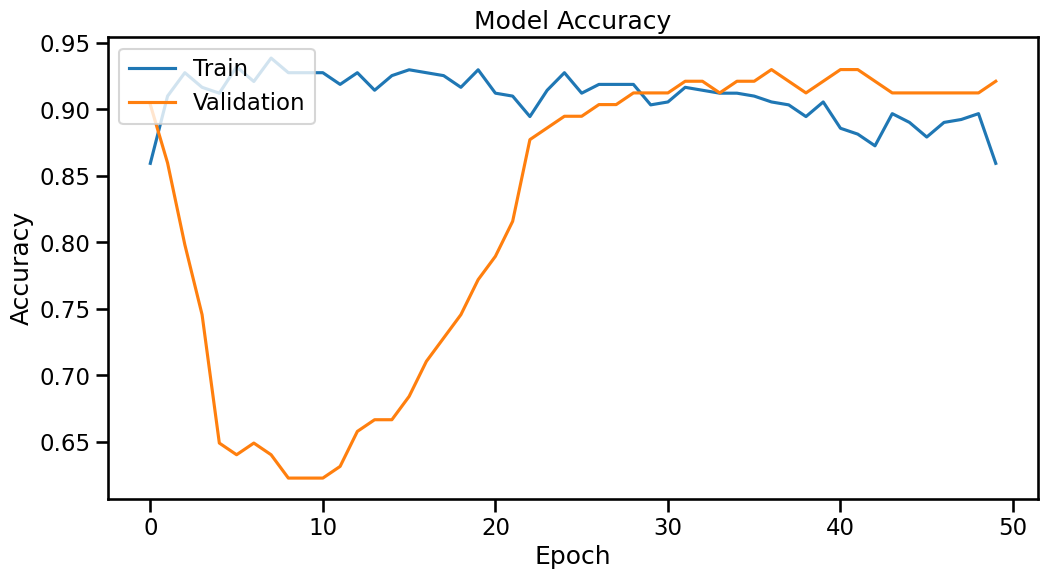

In [109]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')


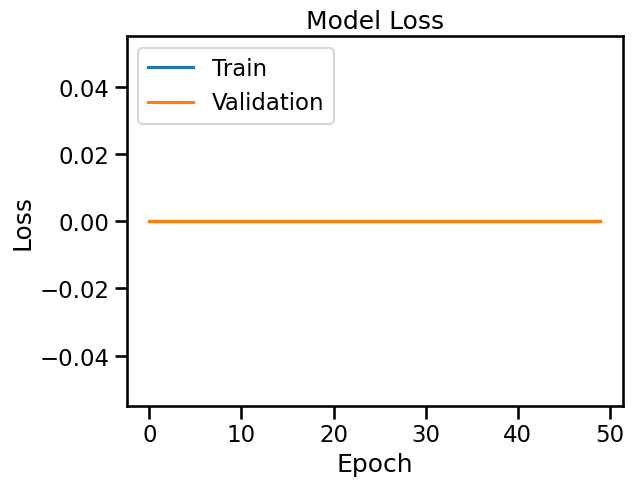

In [110]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

## Model Training with Optimization Techniques

# Adam Optimization

In [111]:
model2 = Sequential()
# Add convolution 2D
model2.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

model2.add(Conv1D(filters=64,kernel_size=2,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Flatten())
model2.add(Dense(64,activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(1,activation='sigmoid'))
model2.compile(optimizer=Adam(lr=0.00005),loss='binary_crossentropy',metrics=['accuracy'])
model2.save('saved_models/model2.pkl')
model2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_11 (Conv1D)          (None, 29, 32)            96        
                                                                 
 batch_normalization_10 (Ba  (None, 29, 32)            128       
 tchNormalization)                                               
                                                                 
 dropout_15 (Dropout)        (None, 29, 32)            0         
                                                                 
 conv1d_12 (Conv1D)          (None, 28, 64)            4160      
                                                                 
 batch_normalization_11 (Ba  (None, 28, 64)            256       
 tchNormalization)                                               
                                                                 
 dropout_16 (Dropout)        (None, 28, 64)          

In [115]:
adam_model = model2.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

Epoch 1/50
15/15 [==============================] - 0s 13ms/step - loss: 0.0296 - accuracy: 0.9890 - val_loss: 0.1230 - val_accuracy: 0.9737
Epoch 2/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0309 - accuracy: 0.9890 - val_loss: 0.1349 - val_accuracy: 0.9649
Epoch 3/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0560 - accuracy: 0.9824 - val_loss: 0.1478 - val_accuracy: 0.9649
Epoch 4/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0465 - accuracy: 0.9868 - val_loss: 0.1562 - val_accuracy: 0.9474
Epoch 5/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0271 - accuracy: 0.9846 - val_loss: 0.1468 - val_accuracy: 0.9561
Epoch 6/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0218 - accuracy: 0.9934 - val_loss: 0.1359 - val_accuracy: 0.9561
Epoch 7/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0353 - accuracy: 0.9912 - val_loss: 0.1330 - val_accuracy: 0.9561
Epoch 8/50
15/15 [=

In [116]:
_, train_accuracy = model2.evaluate(X_train, y_train)
test_loss, test_accuracy = model2.evaluate(X_test, y_test)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

4/4 [==============================] - 0s 4ms/step - loss: 0.1281 - accuracy: 0.9649
Training Accuracy: 100.00%
Test Accuracy: 96.49%


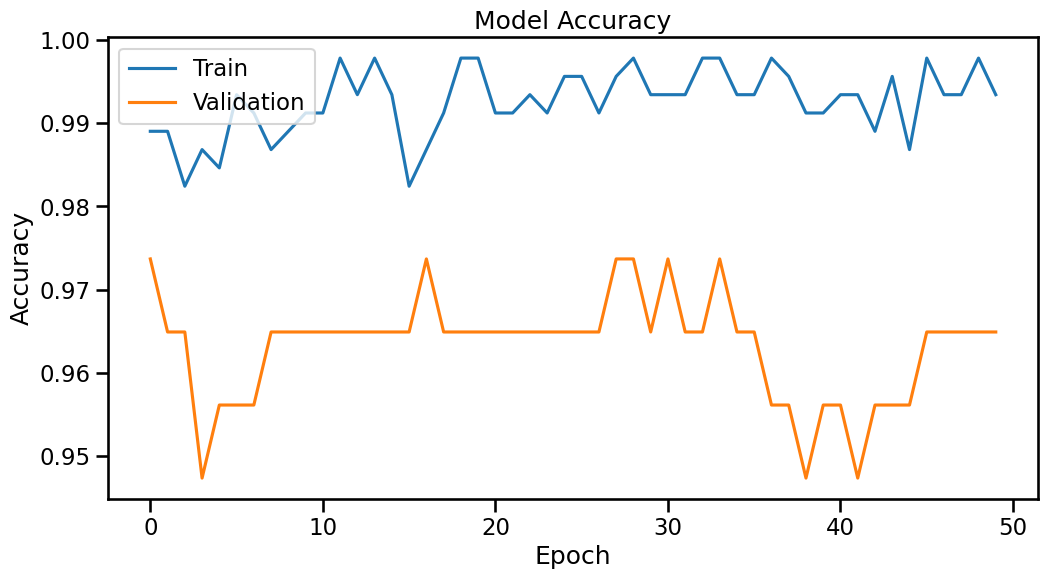

In [118]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.plot(adam_model.history['accuracy'])
plt.plot(adam_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')


## Stochastic Gradient Descent Optimization technique

In [120]:
model3 = Sequential()
# Add convolution 2D
model3.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

model3.add(Conv1D(filters=64,kernel_size=2,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Flatten())
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(1,activation='sigmoid'))


model3.compile(optimizer=SGD(0.9),loss='binary_crossentropy',metrics=['accuracy'])
model3.save('saved_models/model3.pkl')
model3.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_13 (Conv1D)          (None, 29, 32)            96        
                                                                 
 batch_normalization_12 (Ba  (None, 29, 32)            128       
 tchNormalization)                                               
                                                                 
 dropout_18 (Dropout)        (None, 29, 32)            0         
                                                                 
 conv1d_14 (Conv1D)          (None, 28, 64)            4160      
                                                                 
 batch_normalization_13 (Ba  (None, 28, 64)            256       
 tchNormalization)                                               
                                                                 
 dropout_19 (Dropout)        (None, 28, 64)          

In [121]:
sgd_model = model3.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

Epoch 1/50
15/15 [==============================] - 1s 25ms/step - loss: nan - accuracy: 0.6154 - val_loss: nan - val_accuracy: 0.6228
Epoch 2/50
15/15 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.6286 - val_loss: nan - val_accuracy: 0.6228
Epoch 3/50
15/15 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.6286 - val_loss: nan - val_accuracy: 0.6228
Epoch 4/50
15/15 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.6286 - val_loss: nan - val_accuracy: 0.6228
Epoch 5/50
15/15 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.6286 - val_loss: nan - val_accuracy: 0.6228
Epoch 6/50
15/15 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.6286 - val_loss: nan - val_accuracy: 0.6228
Epoch 7/50
15/15 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.6286 - val_loss: nan - val_accuracy: 0.6228
Epoch 8/50
15/15 [==============================] - 0s 10ms/s

In [122]:
_, train_accuracy = model3.evaluate(X_train, y_train)
test_loss, test_accuracy = model3.evaluate(X_test, y_test)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

4/4 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.6228
Training Accuracy: 62.86%
Test Accuracy: 62.28%


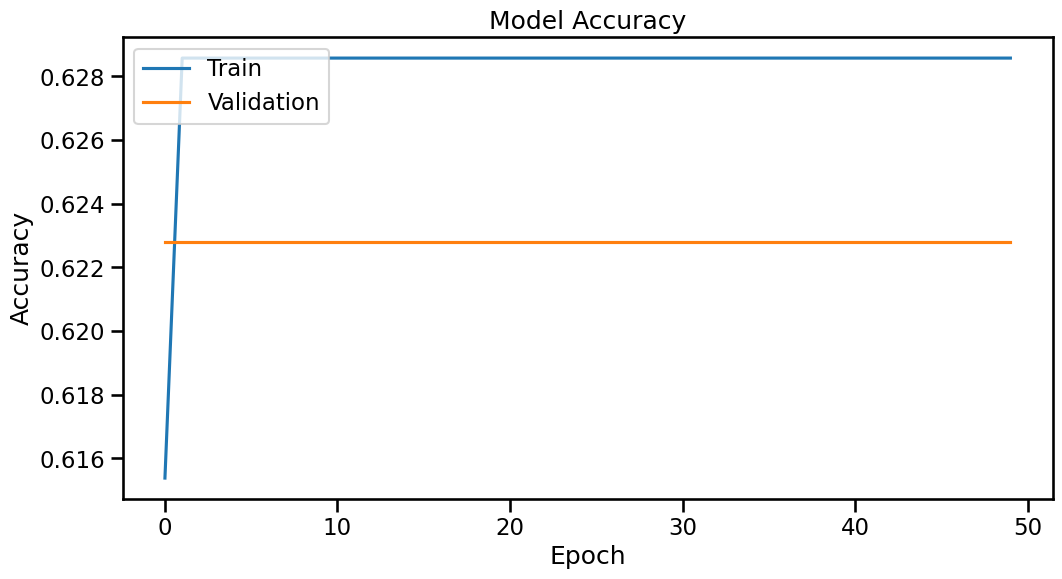

In [123]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.plot(sgd_model.history['accuracy'])
plt.plot(sgd_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

## Root Mean Square Propagation

In [126]:
model4 = Sequential()
model4.add(Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))

model4.add(Conv1D(filters=64,kernel_size=2,activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))

model4.add(Flatten())
model4.add(Dense(64,activation='relu'))
model4.add(Dropout(0.5))

model4.add(Dense(1,activation='sigmoid'))


model4.compile(optimizer=RMSprop(),loss='binary_crossentropy',metrics=['accuracy'])
model4.save('saved_models/model4.pkl')
model4.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_17 (Conv1D)          (None, 29, 32)            96        
                                                                 
 batch_normalization_16 (Ba  (None, 29, 32)            128       
 tchNormalization)                                               
                                                                 
 dropout_24 (Dropout)        (None, 29, 32)            0         
                                                                 
 conv1d_18 (Conv1D)          (None, 28, 64)            4160      
                                                                 
 batch_normalization_17 (Ba  (None, 28, 64)            256       
 tchNormalization)                                               
                                                                 
 dropout_25 (Dropout)        (None, 28, 64)          

In [127]:
rms_model = model4.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

Epoch 1/50
15/15 [==============================] - 2s 23ms/step - loss: 0.2773 - accuracy: 0.8813 - val_loss: 0.4510 - val_accuracy: 0.9649
Epoch 2/50
15/15 [==============================] - 0s 10ms/step - loss: 0.1313 - accuracy: 0.9538 - val_loss: 0.4220 - val_accuracy: 0.9649
Epoch 3/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0997 - accuracy: 0.9648 - val_loss: 0.3649 - val_accuracy: 0.9649
Epoch 4/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0931 - accuracy: 0.9670 - val_loss: 0.3140 - val_accuracy: 0.9649
Epoch 5/50
15/15 [==============================] - 0s 9ms/step - loss: 0.1186 - accuracy: 0.9736 - val_loss: 0.2960 - val_accuracy: 0.9474
Epoch 6/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0852 - accuracy: 0.9736 - val_loss: 0.2686 - val_accuracy: 0.9649
Epoch 7/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0947 - accuracy: 0.9648 - val_loss: 0.2681 - val_accuracy: 0.9649
Epoch 8/50
15/15 [

In [128]:
_, train_accuracy = model4.evaluate(X_train, y_train)
test_loss, test_accuracy = model4.evaluate(X_test, y_test)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

4/4 [==============================] - 0s 4ms/step - loss: 0.1622 - accuracy: 0.9649
Training Accuracy: 100.00%
Test Accuracy: 96.49%


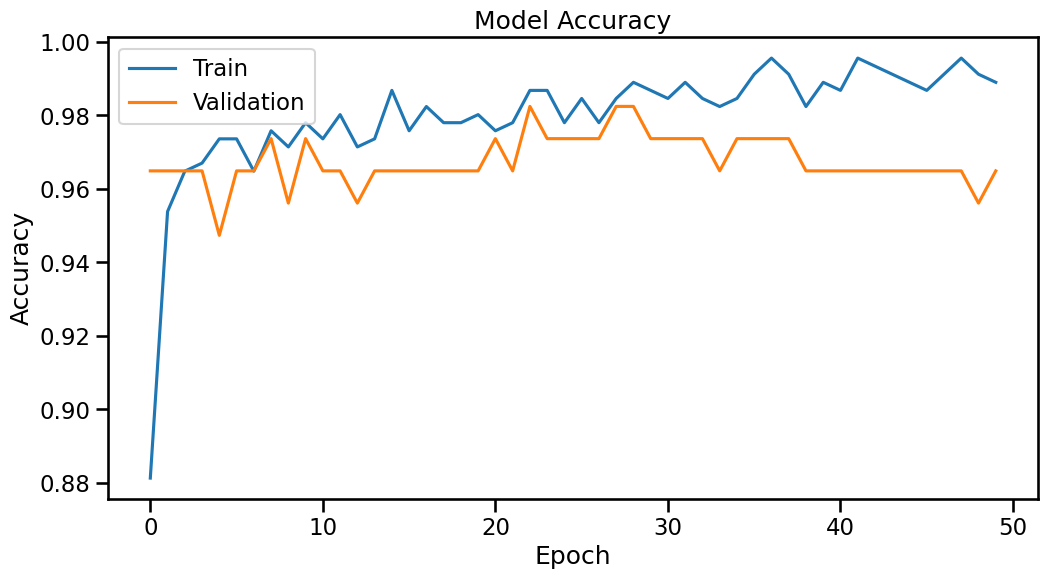

In [129]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.plot(rms_model.history['accuracy'])
plt.plot(rms_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# **Error Analysis: Make Predictions using the best saved model**

In [154]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy_score(y_test,y_pred)
def make_predictions(model_path, X_test, y_test):
    # Load the model
    model = load_model(model_path)
    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    accuracy_score(y_test,y_pred)
    # Make predictions
    predictions = model.predict(X_test)

    # Convert probabilities to binary labels (0 or 1)
    predictions_labels = np.round(predictions).flatten()

    # Convert y_test to binary labels (assuming it's 0 or 1)
    true_labels = y_test

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(true_labels, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    # Calculate classification report
    report = classification_report(true_labels, y_pred)
    print("Classification Report:\n", report)


4/4 [==============================] - 0s 3ms/step


## Without Optimization

In [155]:
model_path = 'saved_models/model1.pkl'
make_predictions(model_path, X_test, y_test )

4/4 [==============================] - 0s 3ms/step
Confusion Matrix:
 [[27 44]
 [31 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.38      0.42        71
           1       0.21      0.28      0.24        43

    accuracy                           0.34       114
   macro avg       0.34      0.33      0.33       114
weighted avg       0.37      0.34      0.35       114



## With Adam Optimization

In [156]:
model_path = 'saved_models/model2.pkl'
make_predictions(model_path, X_test, y_test )

4/4 [==============================] - 0s 3ms/step
Confusion Matrix:
 [[33 38]
 [ 0 43]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.46      0.63        71
           1       0.53      1.00      0.69        43

    accuracy                           0.67       114
   macro avg       0.77      0.73      0.66       114
weighted avg       0.82      0.67      0.66       114



## With SGD

In [157]:
model_path = 'saved_models/model3.pkl'
make_predictions(model_path, X_test, y_test )

4/4 [==============================] - 0s 3ms/step
Confusion Matrix:
 [[63  8]
 [39  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.89      0.73        71
           1       0.33      0.09      0.15        43

    accuracy                           0.59       114
   macro avg       0.48      0.49      0.44       114
weighted avg       0.51      0.59      0.51       114



## With RMSOp

In [158]:
model_path = 'saved_models/model4.pkl'
make_predictions(model_path, X_test, y_test )

4/4 [==============================] - 0s 3ms/step
Confusion Matrix:
 [[27 44]
 [34  9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.38      0.41        71
           1       0.17      0.21      0.19        43

    accuracy                           0.32       114
   macro avg       0.31      0.29      0.30       114
weighted avg       0.34      0.32      0.33       114

